<a href="https://colab.research.google.com/github/201524495/2021_FSRnT/blob/main/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from random import *

print(tf.__version__)

2.4.1


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

In [ ]:
# 60000개의 이미지, 28 X 28 픽셀
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
# 각 레이블은 0과 9 사이의 정수
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# 10000개의 이미지, 28 X 28 픽셀
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

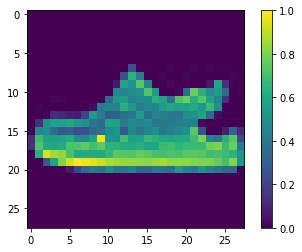

21438


In [ ]:
#데이터 전처리
i = randint(0, 59999) #train_image는 60000개 있다.
plt.figure()
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.show()
print(i)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

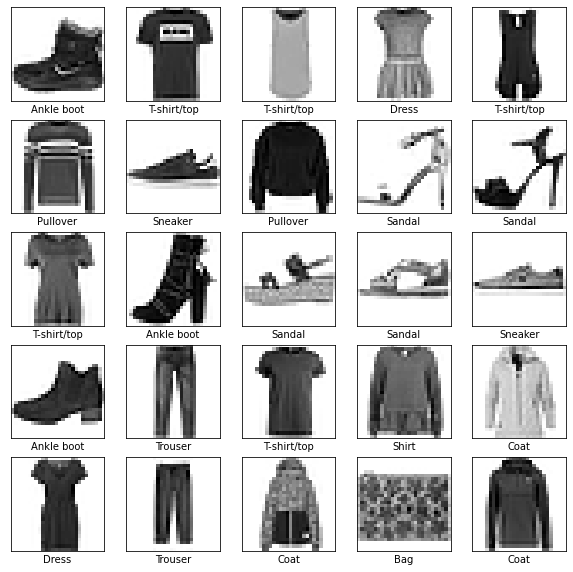

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25) :
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#모델 구성
#층 설정
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)), #2차원 배열을 1차원 배열로 변환
                          keras.layers.Dense(128, activation='relu'), #128개의 노드(뉴런)을 가짐
                          keras.layers.Dense(10, activation='softmax') #10개의 확률로 반환(0 ~ 9)
]) 
# relu는 max(0, x) 그래프를 가진다.
# softmax는 다 더하면 1이 된다.

In [ ]:
#모델 컴파일
model.compile(optimizer='adam', # 옵티마이저 : 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정
              loss='sparse_categorical_crossentropy', # 손실함수 : 훈련 한느 동안 모델의 오차를 측정
              metrics=['accuracy']) # 지표 : 훈련 단계와 테스트 단계를 모니터링하기 위해 사용

In [ ]:
# 모델 훈련
model.fit(train_images, train_labels, epochs=5) #

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6353 - accuracy: 0.7788
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3931 - accuracy: 0.8585
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3423 - accuracy: 0.8751
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.8837
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2941 - accuracy: 0.8930


In [ ]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\n 테스트 정확도 : ", test_acc)
#test set의 정확도가 train set의 정확도 보다 낮은 이유 : Overfitting이 존재하기 때문.

313/313 - 0s - loss: 0.3471 - accuracy: 0.8762

 테스트 정확도 :  0.8762000203132629


In [ ]:
#예측 만들기
predictions = model.predict(test_images)

In [ ]:
#10개의 배열은 10개의 옷 품목에 상응하는 신뢰도를 나타낸다(confidence)
predictions[0]

array([1.6013502e-05, 2.5606210e-08, 1.0927432e-06, 6.2758687e-07,
       3.3008878e-06, 2.7367502e-02, 1.8332574e-05, 1.3105322e-01,
       4.0151466e-05, 8.4149975e-01], dtype=float32)

In [ ]:
#class_name[9]의 품목은 앵클 부츠
#예측값은 
np.argmax(predictions[0])

9

In [ ]:
#예측값이 맞는지 테스트 레이블 확인
test_labels[0]

9

In [ ]:
#10개 클래스에 대해 예측을 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

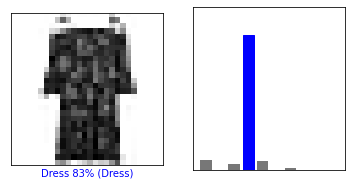

33


In [ ]:
i = randint(0, 100)
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()
print(i)

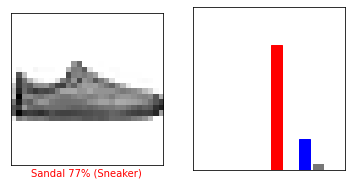

12


In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()
print(i)

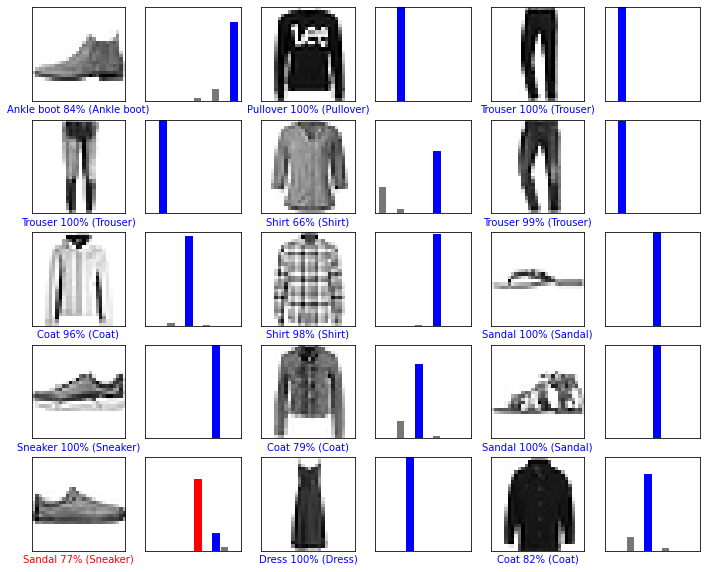

In [ ]:
#올바른 예측은 파랑, 잘못된 예측은 빨강으로 나타낸다. 
num_rows = 5
num_cols = 3
num_image = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_image):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.6013488e-05 2.5606212e-08 1.0927444e-06 6.2758812e-07 3.3008880e-06
  2.7367491e-02 1.8332594e-05 1.3105316e-01 4.0151503e-05 8.4149981e-01]]


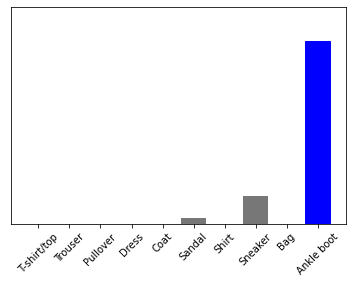

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9